In [1]:
#Import Data and Visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#Load and have a brief look at the data
data = pd.read_csv('data.csv')
data.head()

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
#Get information of data
data.shape

(699, 11)

## Data Preprocessing

#### We are classifying on class column. Let us shed more light on this

In [5]:
data['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [6]:
#Next let us check the data types
data.dtypes

id                       int64
clump_thickness          int64
cell_size                int64
cell_shape               int64
marginal_adhesion        int64
epithelial_cell_size     int64
bare_nuclei             object
bland_chromatin          int64
nucleoli                 int64
mitoses                  int64
class                    int64
dtype: object

#### The bare nuclei field is shown as an object. This could be because it holds some non numeric values like NaN. We need to have a glance at it and see more

In [8]:
data['bare_nuclei']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nuclei, Length: 699, dtype: object

In [11]:
#List all non numeric rows
data[data['bare_nuclei'] == '?']

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,nucleoli,mitoses,class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


<p> 19 rows affected out of 699. We can replace with median or mean

In [14]:
#Create a data frame from these 19 rows in order to explore them further. Where there is no digit, i returns false
digits_in_bare_nuclei = pd.DataFrame(data.bare_nuclei.str.isdigit())

In [13]:
digits_in_bare_nuclei

,bare_nuclei
0,True
1,True
2,True
3,True
4,True
...,...
694,True
695,True
696,True
697,True


In [15]:
# In order to handle '?', we change it to NaN
df = data.replace('?', np.nan)

In [16]:
#See the result
df['bare_nuclei']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nuclei, Length: 699, dtype: object

In [17]:
#Replace Nan with the median value
df = df.fillna(df.median())

In [21]:
df['bare_nuclei']

id                      0.0
clump_thickness         0.0
cell_size               0.0
cell_shape              0.0
marginal_adhesion       0.0
epithelial_cell_size    0.0
bare_nuclei             0.0
bland_chromatin         0.0
nucleoli                0.0
mitoses                 0.0
class                   0.0
dtype: float64


In [19]:
df.dtypes

id                       int64
clump_thickness          int64
cell_size                int64
cell_shape               int64
marginal_adhesion        int64
epithelial_cell_size     int64
bare_nuclei             object
bland_chromatin          int64
nucleoli                 int64
mitoses                  int64
class                    int64
dtype: object

In [22]:
#Convert column type to in64
df['bare_nuclei'] = df['bare_nuclei'].astype('int64')

In [23]:
#Check the types again
df.dtypes

id                      int64
clump_thickness         int64
cell_size               int64
cell_shape              int64
marginal_adhesion       int64
epithelial_cell_size    int64
bare_nuclei             int64
bland_chromatin         int64
nucleoli                int64
mitoses                 int64
class                   int64
dtype: object

## Exploratory Data Analysis

In [24]:
df.head()

,id,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [26]:
#We don't need the id column. It dos not give any informatio on the model.
df.drop('id', axis= 1, inplace = True )

In [27]:
df.head()

,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [29]:
#Show statistical information of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
clump_thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
cell_size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
cell_shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
marginal_adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
epithelial_cell_size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
bare_nuclei,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
bland_chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


### Data does not have a huge difference in the range. No scaling is necessary

C:\Users\Fredrick\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='class', ylabel='Density'>

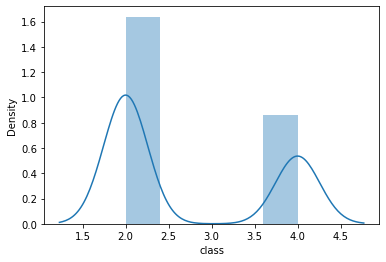

In [34]:
#Plot the distribution of class
sns.distplot(df['class'])

### We see that we have either a 2 or a 4. We thus will need to classify

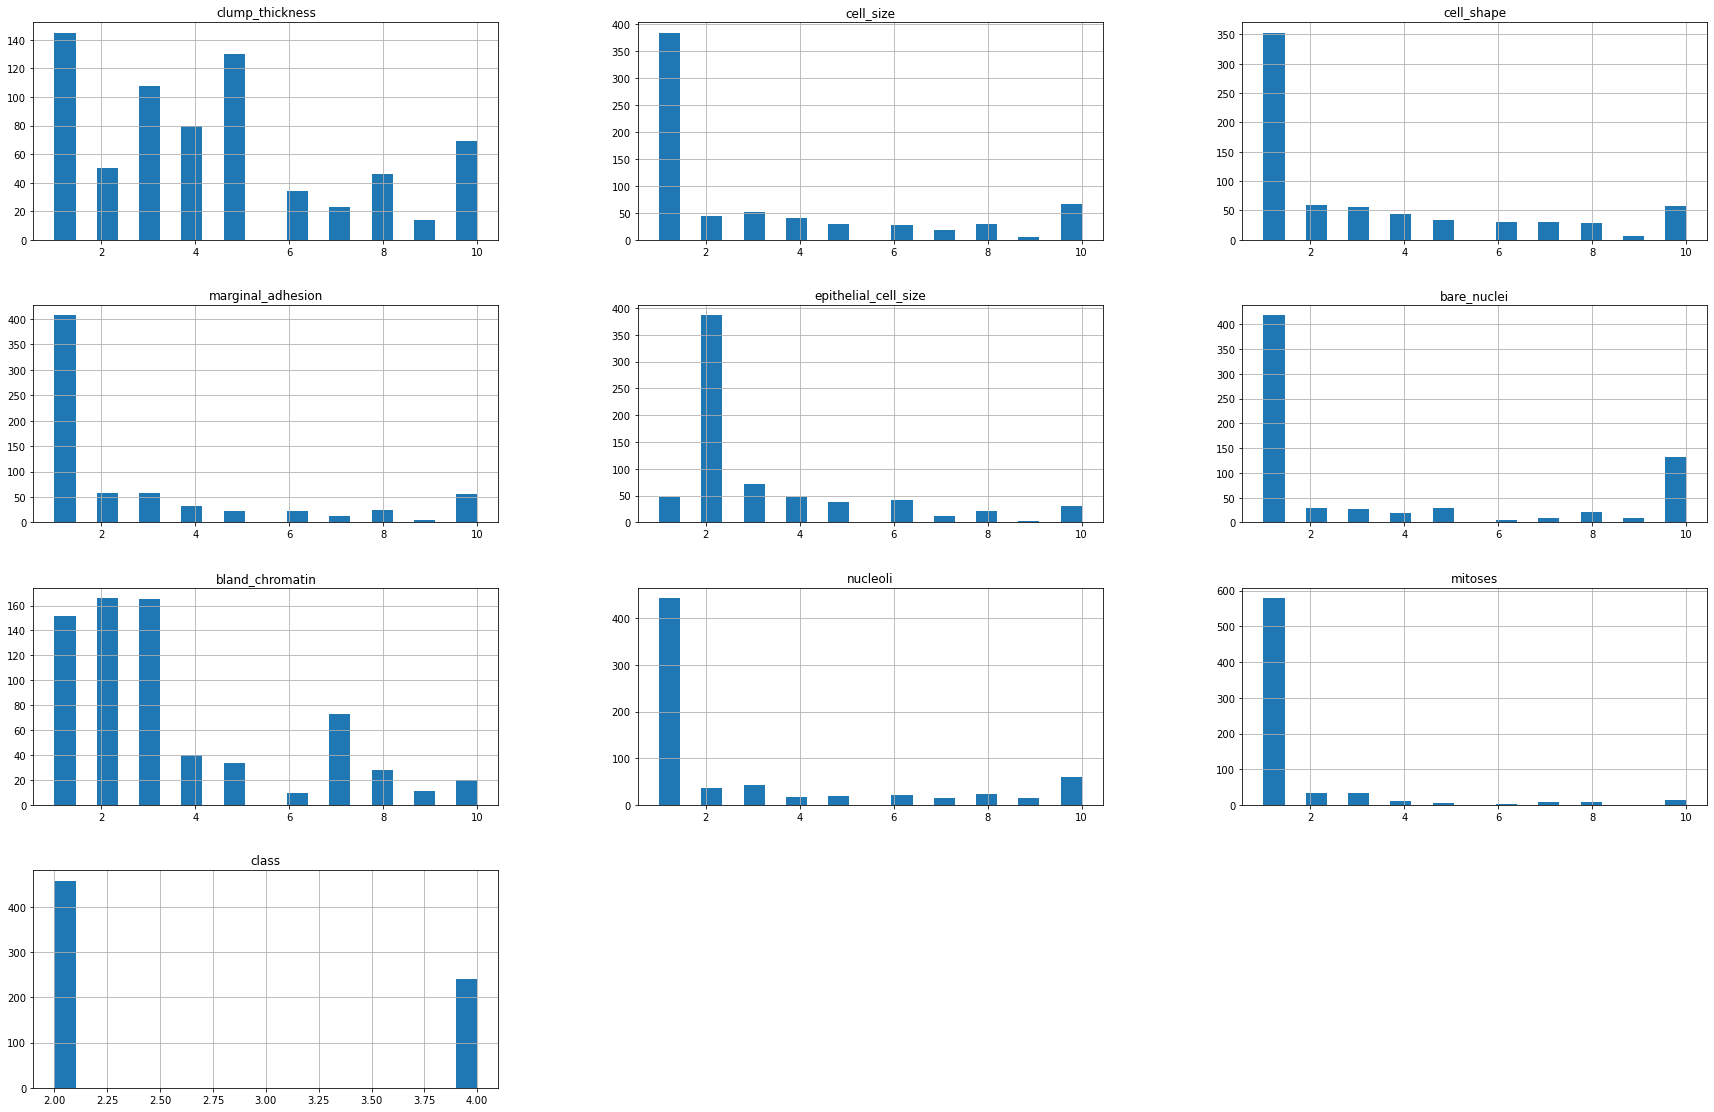

In [43]:
#Do a multivariate analysis. Plot a histogram of all other columns
df.hist(bins = 20, figsize = (30, 30), layout = (6, 3));

#### Most column values are around 1.0. Let's use Box plot to confirm this

<AxesSubplot:>

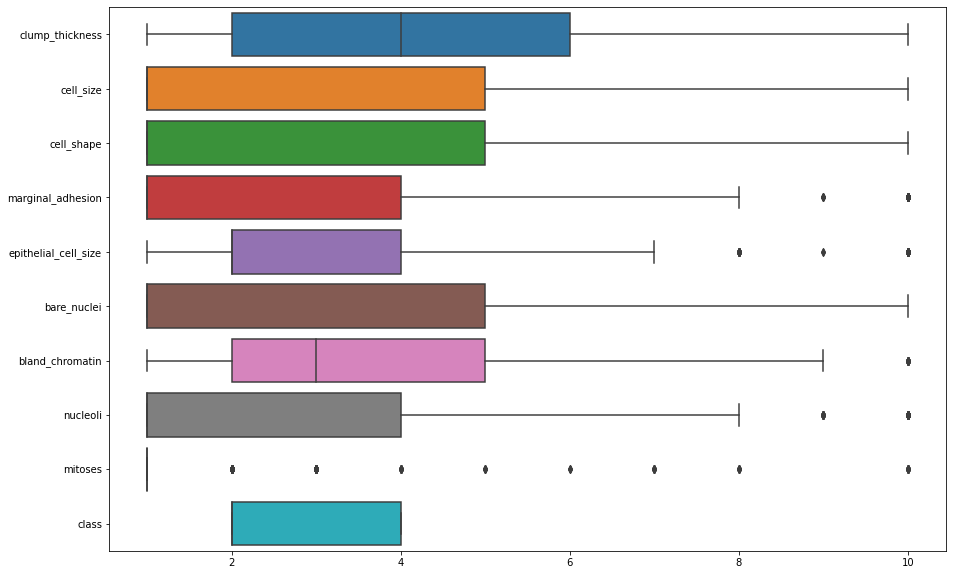

In [47]:
plt.figure(figsize = (15, 10))
sns.boxplot(data = df, orient = 'h')

### Check the correlation between columns

In [48]:
df.corr()

,clump_thickness,cell_size,cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,nucleoli,mitoses,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
epithelial_cell_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
bare_nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


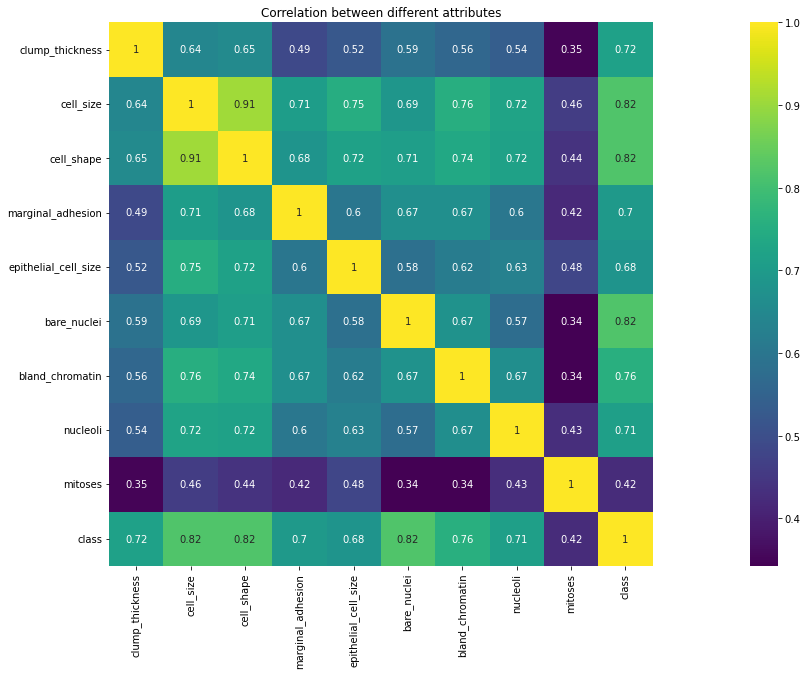

In [49]:
#Let's plot a heatmap to understand out data more
plt.figure(figsize = (35, 10))
sns.heatmap(df.corr(), vmax = 1, square = True, annot = True, cmap = 'viridis')
plt.title('Correlation between different attributes')
plt.show()

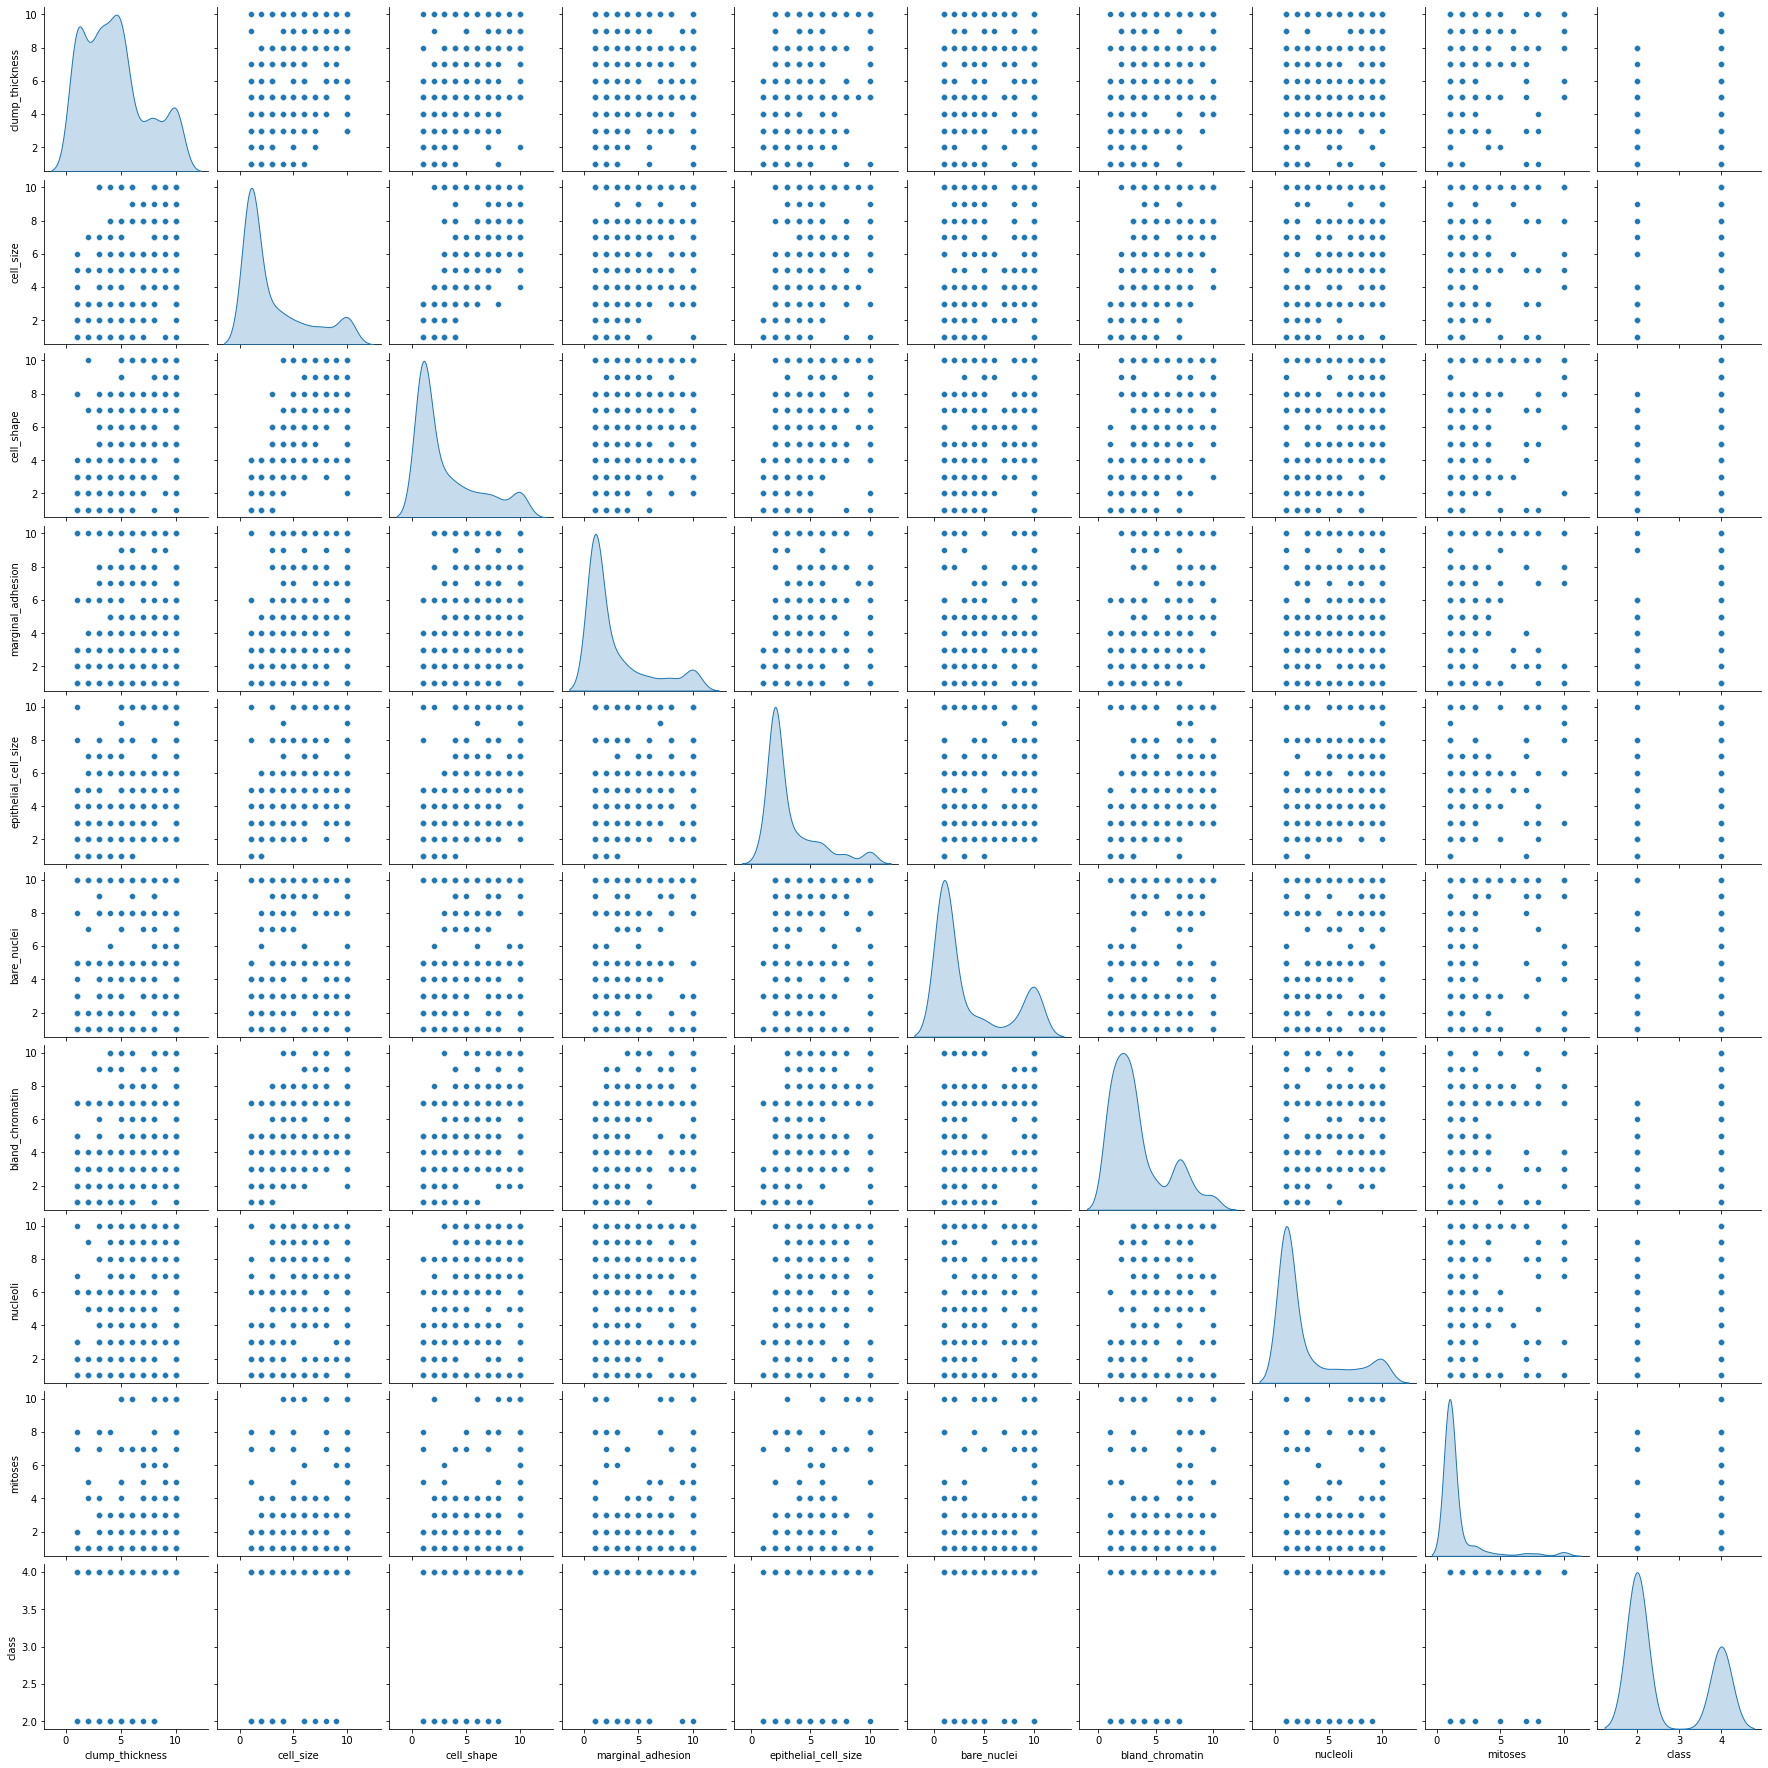

In [50]:
#A pair plot to see the distribution of attributes
sns.pairplot(df, diag_kind = 'kde')

## Model Building